<a href="https://colab.research.google.com/github/srivastavahiren/Machine-Learning-with-Python/blob/master/Upper_Confidence_Bound(UCB)_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##Importing Dataset


In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

##Implementing UCB

In [3]:
import math
N=10000
d = 10  #no. of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selections[i]>0:
      avg_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] +=1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] += dataset.values[n,ad]
  total_reward+=reward




##Visualising the results

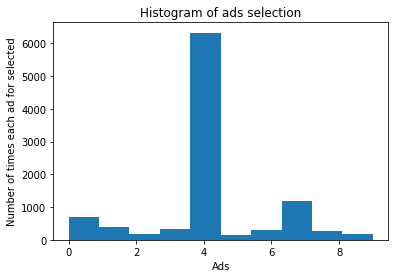

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad for selected")
plt.show()